In [8]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# 채무 gap 평균 증가량을 (21개 기준)으로 평균 값을 낸 뒤
# 2020년 채무 gdp에 더한 뒤 나눴을 때 60%가 넘는지 확인한뒤
# 넘지 않는다면 2021년 채무 gdp를 더해 다시 평균 증가량을 구해준뒤
# 다시 나눠 60%가 넘는지 확인한 뒤 60%가 넘을 때까지 확인한다.

# 그런 다음 linear regression을 이용하여 그래프 등을 그린다!

In [10]:
df = pd.read_csv("data.csv")
df.dropna()

df.head()

,가구원수,가구주연령,소득,소득분위
0,1.66,59.93,328539,1
1,1.59,61.47,359373,1
2,1.56,62.29,334742,1
3,1.53,62.01,377784,1
4,1.58,63.36,345667,1


In [11]:
from sklearn.model_selection import train_test_split

#train data X = (현재까지 평균 gdp, 현재까지 평균 채무, 현재 gdp, 현재 채무)
#train data Y = (다음 년도 gdp, 다음 년도 채무)

x = df[['가구원수','가구주연령', '소득분위']]
y = df[['소득']]


x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3)


In [12]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [13]:
y_predict = lr.predict(x_test)
# y_predict1 = y_predict
# y_predict2 = y_predict
# print(y_predict)
# # print(y_predict)
# print(y_predict.size)
# range1 = y_predict.size/2
# range1 = int(range1)
# y_year = []
# y_rate = []
# print(range1)
# for i in range(1, range1+1):
#     y_year = np.append(y_year, y_predict[i-1][1])
#     y_rate = np.append(y_rate, y_predict[i-1][0])
# print(y_year.size)
# print(y_rate.size)
# print(y_year)
# print(y_rate)

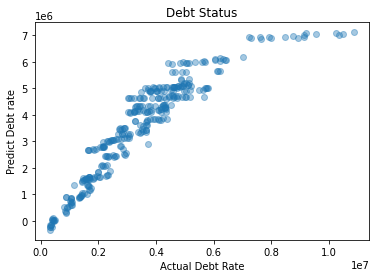

In [14]:
import matplotlib.pyplot as plt

# plt.scatter(y_year, y_rate, alpha=0.4)
plt.scatter(y_test, y_predict, alpha=0.4)

plt.xlabel("Actual Debt Rate")
plt.ylabel("Predict Debt rate")
plt.title("Debt Status")
plt.show()

# lr.coef_

In [15]:
lr.intercept_

array([-3326051.7317864])

In [19]:
my_income = [[2,30,5]]
my_predict = lr.predict(my_income)
print(my_predict)
print(lr.score(x_train, y_train))
print(lr.score(x_test, y_test))

[[2021363.48191692]]
0.8644543422616842
0.8513850823324229


In [17]:
from sklearn.linear_model import Ridge

#저희가 원래 하던 방식이 아닌 수업 ppt week10 40page Ridge라는 방식으로 해도 크게 성능이 좋아 지지 않습니다
#더 좋은 데이터를 찾아서 넣으면 성능이 더 좋아질 듯 합니다!
ridge = Ridge(alpha=0.01, normalize=True).fit(x_train, y_train)
print(ridge.score(x_train, y_train))
print(ridge.score(x_test, y_test))

0.8639829369680186
0.8517572761363225
